In [9]:
%matplotlib inline
import pandas as pd
import requests as req
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import pymc as pymc


#Na Raça

In [10]:
xvals = np.linspace(-10,10)

In [11]:
y = sp.stats.norm.pdf(xvals, 0, 2.5)

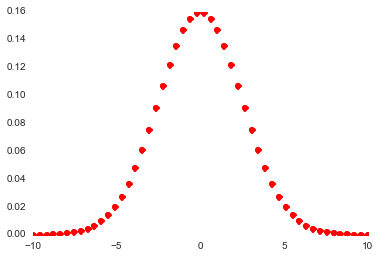

In [12]:
plt.plot(xvals, y, 'ro')

In [13]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

(1851, 1962)

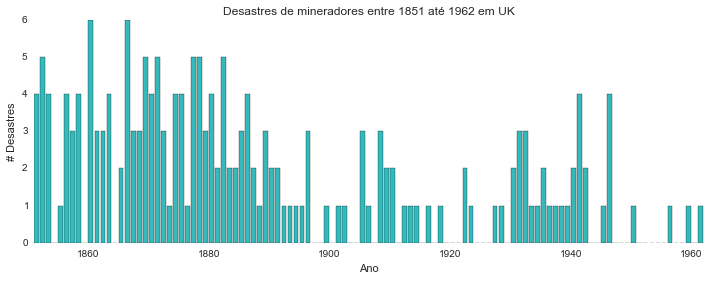

In [15]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(1851, 1962), disasters_array, color="#34BABD")
plt.xlabel("Ano")
plt.ylabel("# Desastres")
plt.title(u"Desastres de mineradores entre 1851 até 1962 em UK")
plt.xlim(1851, 1962)

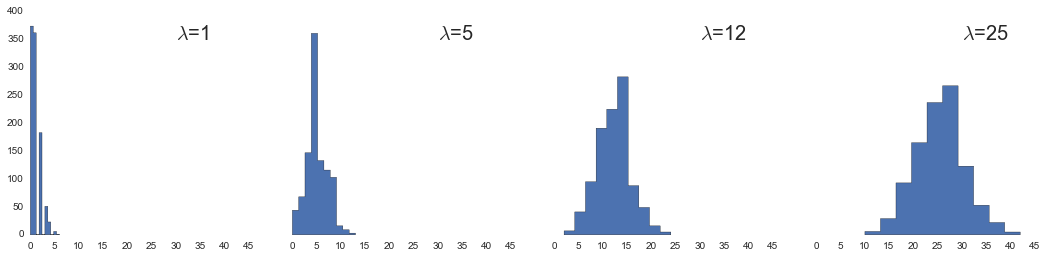

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(18,4), sharex=True, sharey=True)
for i,l in enumerate([1, 5, 12, 25]):
    axes[i].hist(np.random.poisson(l, 1000), histtype="stepfilled")
    axes[i].annotate(r'$\lambda$=%i' % l, xy=(1, 1), xytext=(30, 350), fontsize=20)

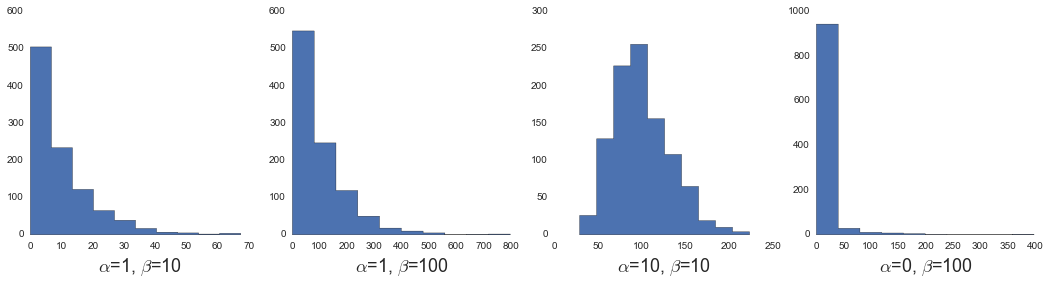

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(18,4))
for i,p in enumerate([(1, 10), (1, 100), (10, 10), (0.1, 100)]):
    axes[i].hist(np.random.gamma(*p, size=1000), histtype="stepfilled")
    axes[i].set_xlabel(r'$\alpha$=%i, $\beta$=%i' % (p[0], p[1]), fontsize=18)

#PyMC

In [18]:
# Data
age = np.array([13, 14, 14,12, 9, 15, 10, 14, 9, 14, 13, 12, 9, 10, 15, 11, 15, 
                11, 7, 13, 13, 10, 9, 6, 11, 15, 13, 10, 9, 9, 15, 14, 14, 10, 14, 11, 13, 14, 10])
price = np.array([2950, 2300, 3900, 2800, 5000, 2999, 3950, 2995, 4500, 2800, 1990, 
                  3500, 5100, 3900, 2900, 4950, 2000, 3400, 8999, 4000, 2950, 3250, 
                  3950, 4600, 4500, 1600, 3900, 4200, 6500, 3500, 2999, 2600, 3250, 
                  2500, 2400, 3990, 4600, 450,4700])/1000.

In [19]:
from pymc import Normal, Gamma, deterministic, MCMC, Matplot

# Constant priors for parameters
a = Normal('a', 0, 0.0001)
b = Normal('b', 0, 0.0001)

# Precision of normal distribution of prices
tau = Gamma('tau', alpha=0.1, beta=0.1)

@deterministic
def mu(x=age, a=a, b=b):
    # Linear age-price model
    return a + b*x

# Sampling distribution of prices
p = Normal('p', mu, tau, value=price, observed=True)

In [20]:
M = MCMC(locals(), db='pickle')

In [21]:
M.sample(iter=20000, burn=10000)

 [-----------------100%-----------------] 20000 of 20000 complete in 3.0 sec

Plotting b


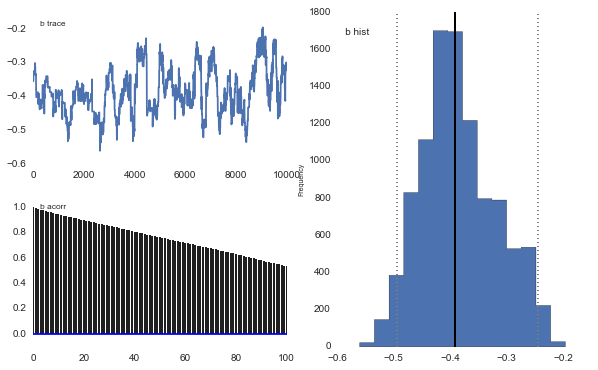

In [23]:
Matplot.plot(b)